In [116]:
import os
import shutil

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

In [4]:
# raw data
df = pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/BA_106.xlsx")

In [5]:
# keep follwing listed parameters
cols_to_keep = ['Date',
 'NpathaFeedRateCoil#1',
 'NpathaFeedRateCoil#2',
 'NpathaFeedRateCoil#3',
 'NpathaFeedRateCoil#4',
 'NpathaFeedRateCoil#5',
 'NpathaFeedRateCoil#6',
 'DS RateCoil#1',
 'DS RateCoil#2',
 'DS RateCoil#3',
 'DS RateCoil#4',
 'DS RateCoil#5',
 'DS RateCoil#6',
 'COT1',
 'COT2',
 'COT3',
 'COT4',
 'COT5',
 'COT6',
 'CIP1',
 'CIP2',
 'CIP3',
 'CIP4',
 'CIP5',
 'CIP6',
 'RUN Duration, hours',
 'RUN No.']
df1 = df[cols_to_keep]

In [19]:
df1[['DS RateCoil#4', 'CIP4']].corr()

,DS RateCoil#4,CIP4
DS RateCoil#4,1.000000,0.015279
CIP4,0.015279,1.000000


In [7]:
# change date columns dtype object to DateTime
df1['Date'] = pd.to_datetime(df1['Date'])
# store the date column
date = df1['Date']
# create a date range list for the date column
date_df = pd.DataFrame(pd.date_range(list(df1['Date'])[0], periods=df1.shape[0], freq='1h'), columns=['Date'])
# change the dataframe datatype to float
df2 = df1[df1.columns[1:]].apply(pd.to_numeric, errors='coerce')
# replace null values in CIP1 column with mean
# df2['CIP1'].fillna(value = df2['CIP1'].mean(), inplace=True)
df3 = pd.concat([date_df, df2], axis=1)
df3

C:\Users\SABYA\Aritar01\CAP_106\cap_106_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,NpathaFeedRateCoil#1,NpathaFeedRateCoil#2,NpathaFeedRateCoil#3,NpathaFeedRateCoil#4,NpathaFeedRateCoil#5,NpathaFeedRateCoil#6,DS RateCoil#1,DS RateCoil#2,DS RateCoil#3,...,COT5,COT6,CIP1,CIP2,CIP3,CIP4,CIP5,CIP6,"RUN Duration, hours",RUN No.
0,2021-01-06 12:00:00,3.354033,3.354033,3.704495,3.264714,3.310598,3.341016,3.794054,3.793429,3.793800,...,798.591768,797.504761,0.989105,0.931971,1.032023,0.978446,0.873201,0.983094,0.0,1
1,2021-01-06 13:00:00,5.958931,5.958931,5.961114,5.784546,5.481600,5.669341,3.397540,3.398215,3.398274,...,812.936182,813.843345,1.252742,1.190137,1.297556,1.230834,1.115812,1.228266,0.1,1
2,2021-01-06 14:00:00,5.946847,5.946847,5.937142,5.769783,5.467056,5.720802,3.300044,3.300114,3.299968,...,814.842320,815.340434,1.176150,1.115144,1.227717,1.157725,1.038685,1.171754,0.2,1
3,2021-01-06 15:00:00,6.303030,6.303030,6.286914,6.044280,5.796690,6.056527,3.299524,3.299660,3.299403,...,815.075133,814.796085,1.240545,1.175766,1.293669,1.213608,1.100261,1.225453,0.3,1
4,2021-01-06 16:00:00,6.582793,6.582793,6.565398,6.304331,6.070115,6.277726,3.323265,3.376370,3.317672,...,814.784032,814.359368,1.131956,1.076333,1.181593,1.101681,0.985506,1.120164,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548,2022-05-02 16:00:00,5.709997,5.709997,5.814525,5.844336,5.951330,5.891736,3.489884,3.489889,3.489773,...,817.806088,818.264519,1.158597,1.200987,1.345795,1.281682,1.220382,1.469659,59.4,15
11549,2022-05-02 17:00:00,5.709468,5.709468,5.810093,5.839333,5.952943,5.908858,3.490102,3.490083,3.490017,...,818.554658,817.962582,1.161251,1.202199,1.344702,1.283642,1.224183,1.472635,59.5,15
11550,2022-05-02 18:00:00,5.759999,5.759999,5.866227,5.892238,5.984259,5.907374,3.489808,3.489739,3.489686,...,817.870654,817.663587,1.162531,1.202464,1.342520,1.285216,1.222200,1.469588,59.6,15
11551,2022-05-02 19:00:00,5.802558,5.802558,5.914639,5.941456,6.035958,5.932698,3.490195,3.490074,3.490029,...,818.374227,818.045729,1.167090,1.208050,1.352378,1.289805,1.227885,1.472233,59.7,15


In [8]:
df10 = df3.copy()

In [9]:
# create ds ratio's, dividing the ds rates by feed rates
dsRatio1 = (df10['DS RateCoil#1'] / df10['NpathaFeedRateCoil#1'])
dsRatio2 = (df10['DS RateCoil#2'] / df10['NpathaFeedRateCoil#2'])
dsRatio3 = (df10['DS RateCoil#3'] / df10['NpathaFeedRateCoil#3'])
dsRatio4 = (df10['DS RateCoil#4'] / df10['NpathaFeedRateCoil#4'])
dsRatio5 = (df10['DS RateCoil#5'] / df10['NpathaFeedRateCoil#5'])
dsRatio6 = (df10['DS RateCoil#6'] / df10['NpathaFeedRateCoil#6'])

# drop individual ds rates and naphtha feeds
cols_ls = ['NpathaFeedRateCoil#1', 
      'NpathaFeedRateCoil#2', 
      'NpathaFeedRateCoil#3', 
      'NpathaFeedRateCoil#4', 
      'NpathaFeedRateCoil#5',
      'NpathaFeedRateCoil#6',
      'DS RateCoil#1',
      'DS RateCoil#2',
      'DS RateCoil#3',
      'DS RateCoil#4',
      'DS RateCoil#5',
      'DS RateCoil#6']

df11 = df10.drop(labels=cols_ls, axis=1)

df11.insert(7, 'DS Ratio1', dsRatio1.values.tolist())
df11.insert(8, 'DS Ratio2', dsRatio2.values.tolist())
df11.insert(9, 'DS Ratio3', dsRatio3.values.tolist())
df11.insert(10, 'DS Ratio4', dsRatio4.values.tolist())
df11.insert(11, 'DS Ratio5', dsRatio5.values.tolist())
df11.insert(12, 'DS Ratio6', dsRatio6.values.tolist())

dsratio = dssteam / feed stock

dssteam decreases ---> pressure dropping

ratio = steam * (1/feed)

In [14]:
feed = 3.354033
steam = 3.794054
pressure = 0.989105
ratio = steam / feed
ratio

1.1311916132011821

In [26]:
df11

,Date,COT1,COT2,COT3,COT4,COT5,COT6,DS Ratio1,DS Ratio2,DS Ratio3,...,DS Ratio5,DS Ratio6,CIP1,CIP2,CIP3,CIP4,CIP5,CIP6,"RUN Duration, hours",RUN No.
0,2021-01-06 12:00:00,801.306831,793.684963,799.305155,803.918910,798.591768,797.504761,1.131192,1.131005,1.024107,...,1.146217,1.135841,0.989105,0.931971,1.032023,0.978446,0.873201,0.983094,0.0,1
1,2021-01-06 13:00:00,812.924074,813.570131,812.505458,813.535393,812.936182,813.843345,0.570159,0.570273,0.570074,...,0.619911,0.599319,1.252742,1.190137,1.297556,1.230834,1.115812,1.228266,0.1,1
2,2021-01-06 14:00:00,815.105875,815.209676,815.177833,815.281158,814.842320,815.340434,0.554923,0.554935,0.555818,...,0.603600,0.576797,1.176150,1.115144,1.227717,1.157725,1.038685,1.171754,0.2,1
3,2021-01-06 15:00:00,815.127883,814.598117,814.983119,814.418757,815.075133,814.796085,0.523482,0.523504,0.524805,...,0.569213,0.544848,1.240545,1.175766,1.293669,1.213608,1.100261,1.225453,0.3,1
4,2021-01-06 16:00:00,814.798239,814.731970,814.762454,814.794830,814.784032,814.359368,0.504841,0.512908,0.505327,...,0.543613,0.525574,1.131956,1.076333,1.181593,1.101681,0.985506,1.120164,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548,2022-05-02 16:00:00,818.202406,817.782587,817.963359,817.746657,817.806088,818.264519,0.611188,0.611189,0.600182,...,0.586425,0.592280,1.158597,1.200987,1.345795,1.281682,1.220382,1.469659,59.4,15
11549,2022-05-02 17:00:00,818.714960,818.156159,818.187240,818.223118,818.554658,817.962582,0.611283,0.611280,0.600682,...,0.586297,0.590679,1.161251,1.202199,1.344702,1.283642,1.224183,1.472635,59.5,15
11550,2022-05-02 18:00:00,818.068604,817.935849,818.040997,817.900811,817.870654,817.663587,0.605870,0.605858,0.594877,...,0.583172,0.590729,1.162531,1.202464,1.342520,1.285216,1.222200,1.469588,59.6,15
11551,2022-05-02 19:00:00,818.287235,818.075823,818.187298,818.166708,818.374227,818.045729,0.601492,0.601472,0.590066,...,0.578216,0.588331,1.167090,1.208050,1.352378,1.289805,1.227885,1.472233,59.7,15


In [127]:
def plotvariable(dataframe, variable):
  
    plt.figure(figsize=(16,4))
    # histogram
    plt.subplot(1,2,1)
    # plt.hist(dataframe[variable], alpha=0.5)
    sns.histplot(dataframe[variable], bins=10, kde=True)

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(dataframe[variable])
    plt.show()

def find_boundaries(dataframe, variable):

    # create an empty dic
    bound_dict = {} 

    # find the IOR 
    Q1 = dataframe[variable].quantile(.25)
    Q3 = dataframe[variable].quantile(.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bound_dict[f'{variable}_Q1'] = Q1
    bound_dict[f'{variable}_Q3'] = Q3
    bound_dict[f'{variable}_IQR'] = IQR
    bound_dict[f'{variable}_lbd'] = lower_bound
    bound_dict[f'{variable}_ubd'] = upper_bound

    return bound_dict


def trim_outliers(dataframe, variable, lbd, ubd):

    # replace the outliers with True
    outliers = np.where(dataframe[variable] > ubd, True, 
    np.where(dataframe[variable] < lbd, True, False))

    # trimmed data
    trimmed_data = dataframe.loc[~(outliers)].reset_index(drop=True)

    return trimmed_data

# DS Ratio's VS CIP's

In [87]:
df12 = df11[["DS Ratio1", "DS Ratio2", "DS Ratio3", "DS Ratio4", "DS Ratio5", "DS Ratio6", 
             "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]

In [88]:
df12 = df11[["DS Ratio1", "DS Ratio2", "DS Ratio3", "DS Ratio4", "DS Ratio5", "DS Ratio6", 
             "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]

corr1 = df12[["DS Ratio1", "CIP1"]].corr().reset_index(drop=True)
corr2 = df12[["DS Ratio2", "CIP2"]].corr().reset_index(drop=True)
corr3 = df12[["DS Ratio3", "CIP3"]].corr().reset_index(drop=True)
corr4 = df12[["DS Ratio4", "CIP4"]].corr().reset_index(drop=True)
corr5 = df12[["DS Ratio5", "CIP5"]].corr().reset_index(drop=True)
corr6 = df12[["DS Ratio6", "CIP6"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1],
    "corr3": corr3[corr3.columns[0]][1],
    "corr4": corr4[corr4.columns[0]][1],
    "corr5": corr5[corr5.columns[0]][1],
    "corr6": corr6[corr6.columns[0]][1]
}


corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='maroon')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/DSRatiosVSCIPs.png")

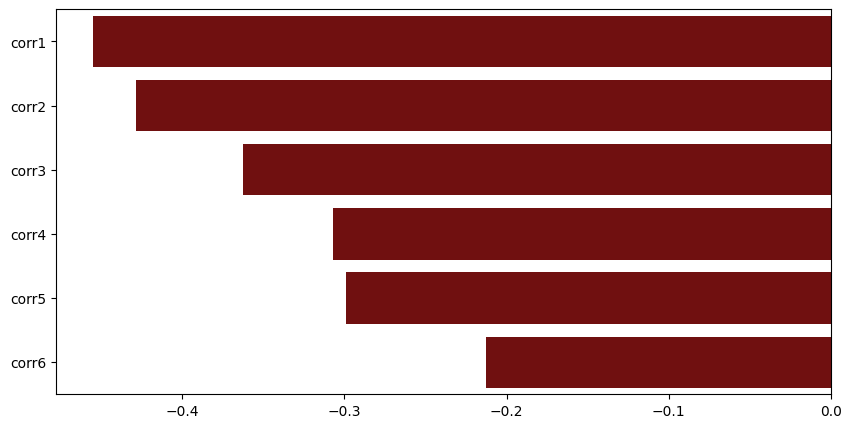

In [89]:
corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='maroon')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/DSRatiosVSCIPs.png")

# COT's VS CIP's

In [91]:
df13 = df11[["COT1", "COT2", "COT3", "COT4", "COT5", "COT6", 
             "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]

In [92]:
df13 = df11[["COT1", "COT2", "COT3", "COT4", "COT5", "COT6", 
             "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]

corr1 = df13[["COT1", "CIP1"]].corr().reset_index(drop=True)
corr2 = df13[["COT2", "CIP2"]].corr().reset_index(drop=True)
corr3 = df13[["COT3", "CIP3"]].corr().reset_index(drop=True)
corr4 = df13[["COT4", "CIP4"]].corr().reset_index(drop=True)
corr5 = df13[["COT5", "CIP5"]].corr().reset_index(drop=True)
corr6 = df13[["COT6", "CIP6"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1],
    "corr3": corr3[corr3.columns[0]][1],
    "corr4": corr4[corr4.columns[0]][1],
    "corr5": corr5[corr5.columns[0]][1],
    "corr6": corr6[corr6.columns[0]][1]
}

corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='green')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/COTsVSCIPs.png")

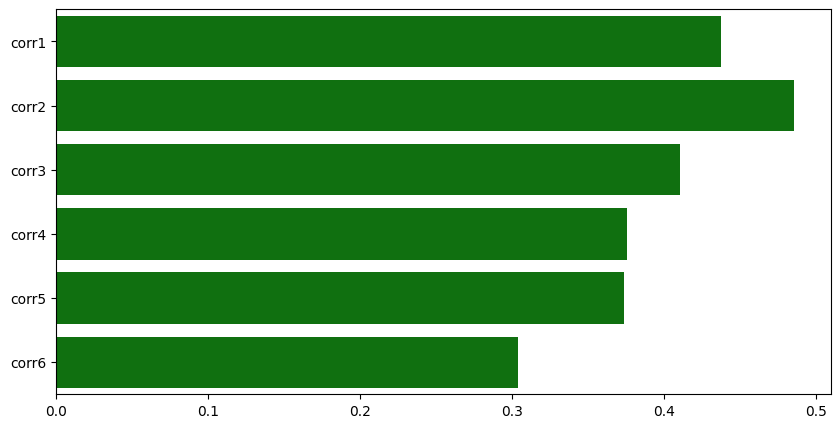

In [95]:
corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='green')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/COTsVSCIPs.png")

In [96]:
df11

,Date,COT1,COT2,COT3,COT4,COT5,COT6,DS Ratio1,DS Ratio2,DS Ratio3,...,DS Ratio5,DS Ratio6,CIP1,CIP2,CIP3,CIP4,CIP5,CIP6,"RUN Duration, hours",RUN No.
0,2021-01-06 12:00:00,801.306831,793.684963,799.305155,803.918910,798.591768,797.504761,1.131192,1.131005,1.024107,...,1.146217,1.135841,0.989105,0.931971,1.032023,0.978446,0.873201,0.983094,0.0,1
1,2021-01-06 13:00:00,812.924074,813.570131,812.505458,813.535393,812.936182,813.843345,0.570159,0.570273,0.570074,...,0.619911,0.599319,1.252742,1.190137,1.297556,1.230834,1.115812,1.228266,0.1,1
2,2021-01-06 14:00:00,815.105875,815.209676,815.177833,815.281158,814.842320,815.340434,0.554923,0.554935,0.555818,...,0.603600,0.576797,1.176150,1.115144,1.227717,1.157725,1.038685,1.171754,0.2,1
3,2021-01-06 15:00:00,815.127883,814.598117,814.983119,814.418757,815.075133,814.796085,0.523482,0.523504,0.524805,...,0.569213,0.544848,1.240545,1.175766,1.293669,1.213608,1.100261,1.225453,0.3,1
4,2021-01-06 16:00:00,814.798239,814.731970,814.762454,814.794830,814.784032,814.359368,0.504841,0.512908,0.505327,...,0.543613,0.525574,1.131956,1.076333,1.181593,1.101681,0.985506,1.120164,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548,2022-05-02 16:00:00,818.202406,817.782587,817.963359,817.746657,817.806088,818.264519,0.611188,0.611189,0.600182,...,0.586425,0.592280,1.158597,1.200987,1.345795,1.281682,1.220382,1.469659,59.4,15
11549,2022-05-02 17:00:00,818.714960,818.156159,818.187240,818.223118,818.554658,817.962582,0.611283,0.611280,0.600682,...,0.586297,0.590679,1.161251,1.202199,1.344702,1.283642,1.224183,1.472635,59.5,15
11550,2022-05-02 18:00:00,818.068604,817.935849,818.040997,817.900811,817.870654,817.663587,0.605870,0.605858,0.594877,...,0.583172,0.590729,1.162531,1.202464,1.342520,1.285216,1.222200,1.469588,59.6,15
11551,2022-05-02 19:00:00,818.287235,818.075823,818.187298,818.166708,818.374227,818.045729,0.601492,0.601472,0.590066,...,0.578216,0.588331,1.167090,1.208050,1.352378,1.289805,1.227885,1.472233,59.7,15


In [97]:
# read the additional data
df14 = pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/Additional_BA_106.xlsx")

In [98]:
df14

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2
0,2021-01-01 00:00:00.000,17.931329,291.779002,51.315970,51.777013
1,2021-01-01 01:00:00.000,17.501189,300.087231,51.271270,51.592316
2,2021-01-01 01:59:59.990,17.774400,310.968798,51.667042,52.060889
3,2021-01-01 02:59:59.985,16.978837,302.346796,50.711192,51.056434
4,2021-01-01 03:59:59.980,16.016152,304.273591,51.861070,52.246687
...,...,...,...,...,...
12379,2022-05-31 18:58:58.120,42.711383,233.667061,50.017260,53.136514
12380,2022-05-31 19:58:58.120,42.658437,233.670287,49.536603,52.846304
12381,2022-05-31 20:58:58.120,42.612559,233.371803,49.418948,53.049036
12382,2022-05-31 21:58:58.120,42.703123,233.243962,50.064544,52.951541


In [99]:
# change date columns dtype object to DateTime
df14['Date'] = pd.to_datetime(df14['Date'])
# store the date column
date = df14['Date']
# create a date range list for the date column
date_df_1 = pd.DataFrame(pd.date_range(list(df14['Date'])[0], periods=df14.shape[0], freq='1h'), columns=['Date'])
# change the dataframe datatype to float
df15 = df14[df14.columns[1:]].apply(pd.to_numeric, errors='coerce')
# replace null values in CIP1 column with mean
# df2['CIP1'].fillna(value = df2['CIP1'].mean(), inplace=True)
df16 = pd.concat([date_df_1, df15], axis=1)
df16

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2
0,2021-01-01 00:00:00,17.931329,291.779002,51.315970,51.777013
1,2021-01-01 01:00:00,17.501189,300.087231,51.271270,51.592316
2,2021-01-01 02:00:00,17.774400,310.968798,51.667042,52.060889
3,2021-01-01 03:00:00,16.978837,302.346796,50.711192,51.056434
4,2021-01-01 04:00:00,16.016152,304.273591,51.861070,52.246687
...,...,...,...,...,...
12379,2022-05-31 19:00:00,42.711383,233.667061,50.017260,53.136514
12380,2022-05-31 20:00:00,42.658437,233.670287,49.536603,52.846304
12381,2022-05-31 21:00:00,42.612559,233.371803,49.418948,53.049036
12382,2022-05-31 22:00:00,42.703123,233.243962,50.064544,52.951541


In [108]:
df17 = pd.merge(df16, df11, on='Date').reset_index(drop=True)

In [111]:
df17

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,COT1,COT2,COT3,COT4,COT5,...,DS Ratio5,DS Ratio6,CIP1,CIP2,CIP3,CIP4,CIP5,CIP6,"RUN Duration, hours",RUN No.
0,2021-01-06 12:00:00,1.178144e-16,272.063493,56.937054,79.477049,801.306831,793.684963,799.305155,803.918910,798.591768,...,1.146217,1.135841,0.989105,0.931971,1.032023,0.978446,0.873201,0.983094,0.0,1
1,2021-01-06 13:00:00,1.178144e-16,267.207402,53.334087,82.662585,812.924074,813.570131,812.505458,813.535393,812.936182,...,0.619911,0.599319,1.252742,1.190137,1.297556,1.230834,1.115812,1.228266,0.1,1
2,2021-01-06 14:00:00,1.178144e-16,252.592778,52.641992,82.256563,815.105875,815.209676,815.177833,815.281158,814.842320,...,0.603600,0.576797,1.176150,1.115144,1.227717,1.157725,1.038685,1.171754,0.2,1
3,2021-01-06 15:00:00,1.178144e-16,253.567194,52.250743,82.205379,815.127883,814.598117,814.983119,814.418757,815.075133,...,0.569213,0.544848,1.240545,1.175766,1.293669,1.213608,1.100261,1.225453,0.3,1
4,2021-01-06 16:00:00,1.178144e-16,251.107256,51.066879,82.019186,814.798239,814.731970,814.762454,814.794830,814.784032,...,0.543613,0.525574,1.131956,1.076333,1.181593,1.101681,0.985506,1.120164,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548,2022-05-02 16:00:00,1.057348e+00,232.965838,49.239505,51.584862,818.202406,817.782587,817.963359,817.746657,817.806088,...,0.586425,0.592280,1.158597,1.200987,1.345795,1.281682,1.220382,1.469659,59.4,15
11549,2022-05-02 17:00:00,1.378470e+01,232.283094,49.063456,51.495196,818.714960,818.156159,818.187240,818.223118,818.554658,...,0.586297,0.590679,1.161251,1.202199,1.344702,1.283642,1.224183,1.472635,59.5,15
11550,2022-05-02 18:00:00,1.380737e+01,231.988511,49.614569,51.453325,818.068604,817.935849,818.040997,817.900811,817.870654,...,0.583172,0.590729,1.162531,1.202464,1.342520,1.285216,1.222200,1.469588,59.6,15
11551,2022-05-02 19:00:00,1.384509e+01,232.458175,49.715542,51.378495,818.287235,818.075823,818.187298,818.166708,818.374227,...,0.578216,0.588331,1.167090,1.208050,1.352378,1.289805,1.227885,1.472233,59.7,15


# FeedTemperature's VS CIP's

In [117]:
df18 = df17[["Feed Temp1", "Feed Temp2",
            "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]
df18['MAXCIP1'] = df18[["CIP1", "CIP2", "CIP3"]].max(axis=1)
df18['MAXCIP2'] = df18[["CIP4", "CIP5", "CIP6"]].max(axis=1)


corr1 = df18[["Feed Temp1", "MAXCIP1"]].corr().reset_index(drop=True)
corr2 = df18[["Feed Temp2", "MAXCIP2"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1]
}


corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='green')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/FeedTempsVSCIPs.png")

,Feed Temp1,Feed Temp2,CIP1,CIP2,CIP3,CIP4,CIP5,CIP6,MAXCIP1,MAXCIP2
0,56.937054,79.477049,0.989105,0.931971,1.032023,0.978446,0.873201,0.983094,1.032023,0.983094
1,53.334087,82.662585,1.252742,1.190137,1.297556,1.230834,1.115812,1.228266,1.297556,1.230834
2,52.641992,82.256563,1.176150,1.115144,1.227717,1.157725,1.038685,1.171754,1.227717,1.171754
3,52.250743,82.205379,1.240545,1.175766,1.293669,1.213608,1.100261,1.225453,1.293669,1.225453
4,51.066879,82.019186,1.131956,1.076333,1.181593,1.101681,0.985506,1.120164,1.181593,1.120164
...,...,...,...,...,...,...,...,...,...,...
11548,49.239505,51.584862,1.158597,1.200987,1.345795,1.281682,1.220382,1.469659,1.345795,1.469659
11549,49.063456,51.495196,1.161251,1.202199,1.344702,1.283642,1.224183,1.472635,1.344702,1.472635
11550,49.614569,51.453325,1.162531,1.202464,1.342520,1.285216,1.222200,1.469588,1.342520,1.469588
11551,49.715542,51.378495,1.167090,1.208050,1.352378,1.289805,1.227885,1.472233,1.352378,1.472233


In [118]:
corr1 = df18[["Feed Temp1", "MAXCIP1"]].corr().reset_index(drop=True)
corr2 = df18[["Feed Temp2", "MAXCIP2"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1]
}

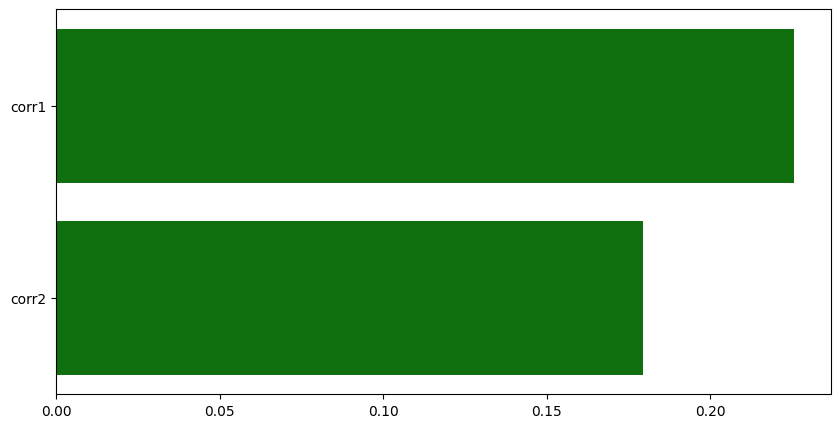

In [119]:
corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='green')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/FeedTempsVSCIPs.png")

# DSTemp VS CIP's

In [122]:
df19 = df17[["DS Temp",
            "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]


corr1 = df19[["DS Temp", "CIP1"]].corr().reset_index(drop=True)
corr2 = df19[["DS Temp", "CIP2"]].corr().reset_index(drop=True)
corr3 = df19[["DS Temp", "CIP3"]].corr().reset_index(drop=True)
corr4 = df19[["DS Temp", "CIP4"]].corr().reset_index(drop=True)
corr5 = df19[["DS Temp", "CIP5"]].corr().reset_index(drop=True)
corr6 = df19[["DS Temp", "CIP6"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1],
    "corr3": corr3[corr3.columns[0]][1],
    "corr4": corr4[corr4.columns[0]][1],
    "corr5": corr5[corr5.columns[0]][1],
    "corr6": corr6[corr6.columns[0]][1]
}


corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='maroon')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/DSTempVSCIPs.png")

,DS Temp,CIP1,CIP2,CIP3,CIP4,CIP5,CIP6
0,272.063493,0.989105,0.931971,1.032023,0.978446,0.873201,0.983094
1,267.207402,1.252742,1.190137,1.297556,1.230834,1.115812,1.228266
2,252.592778,1.176150,1.115144,1.227717,1.157725,1.038685,1.171754
3,253.567194,1.240545,1.175766,1.293669,1.213608,1.100261,1.225453
4,251.107256,1.131956,1.076333,1.181593,1.101681,0.985506,1.120164
...,...,...,...,...,...,...,...
11548,232.965838,1.158597,1.200987,1.345795,1.281682,1.220382,1.469659
11549,232.283094,1.161251,1.202199,1.344702,1.283642,1.224183,1.472635
11550,231.988511,1.162531,1.202464,1.342520,1.285216,1.222200,1.469588
11551,232.458175,1.167090,1.208050,1.352378,1.289805,1.227885,1.472233


In [123]:
corr1 = df19[["DS Temp", "CIP1"]].corr().reset_index(drop=True)
corr2 = df19[["DS Temp", "CIP2"]].corr().reset_index(drop=True)
corr3 = df19[["DS Temp", "CIP3"]].corr().reset_index(drop=True)
corr4 = df19[["DS Temp", "CIP4"]].corr().reset_index(drop=True)
corr5 = df19[["DS Temp", "CIP5"]].corr().reset_index(drop=True)
corr6 = df19[["DS Temp", "CIP6"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1],
    "corr3": corr3[corr3.columns[0]][1],
    "corr4": corr4[corr4.columns[0]][1],
    "corr5": corr5[corr5.columns[0]][1],
    "corr6": corr6[corr6.columns[0]][1]
}

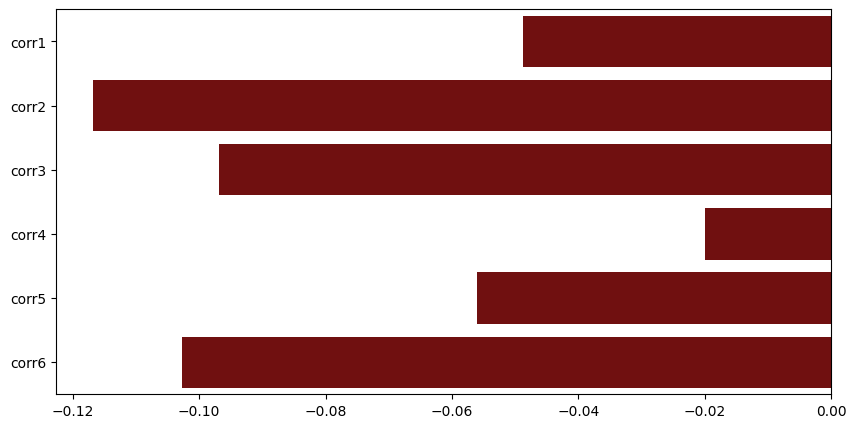

In [126]:
corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='maroon')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/DSTempVSCIPs.png")

# Outliers in individual parameters

In [130]:
data = df17.copy()

In [131]:
data.columns

Index(['Date', 'BFW Rate', 'DS Temp', 'Feed Temp1', 'Feed Temp2', 'COT1',
       'COT2', 'COT3', 'COT4', 'COT5', 'COT6', 'DS Ratio1', 'DS Ratio2',
       'DS Ratio3', 'DS Ratio4', 'DS Ratio5', 'DS Ratio6', 'CIP1', 'CIP2',
       'CIP3', 'CIP4', 'CIP5', 'CIP6', 'RUN Duration, hours', 'RUN No.'],
      dtype='object')

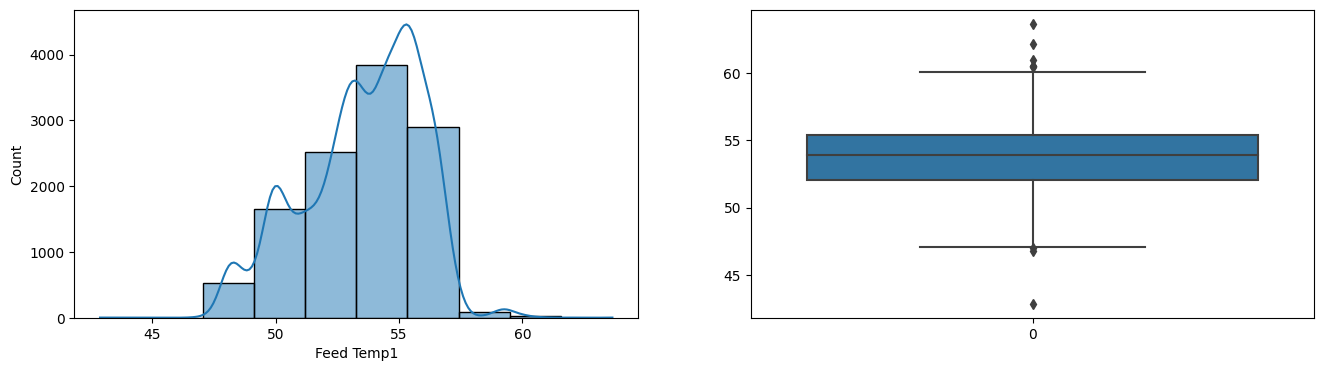

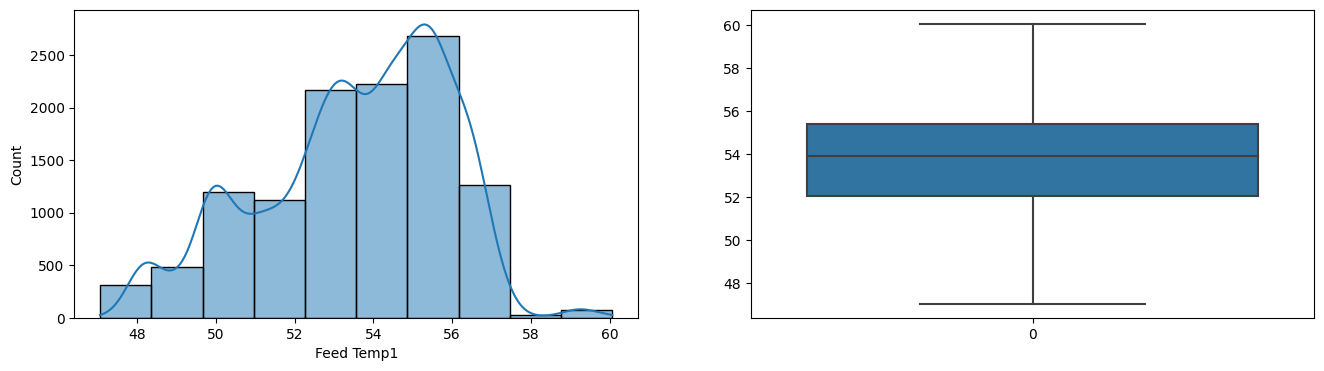

In [170]:
plotvariable(data, 'Feed Temp1')

bound_info = find_boundaries(data, 'Feed Temp1')
lbd = bound_info['Feed Temp1_lbd']
ubd = bound_info['Feed Temp1_ubd']

data1 = trim_outliers(data, 'Feed Temp1', lbd, ubd)

plotvariable(data1, 'Feed Temp1')

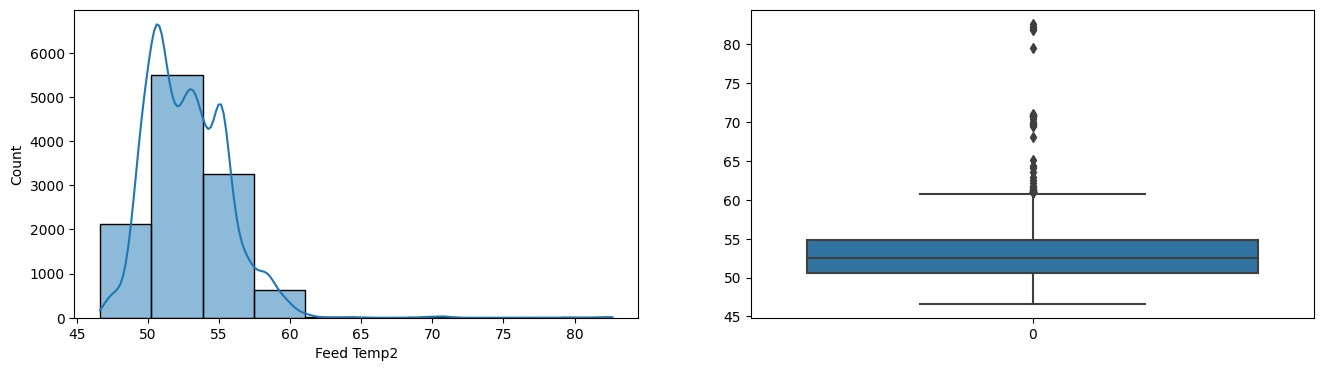

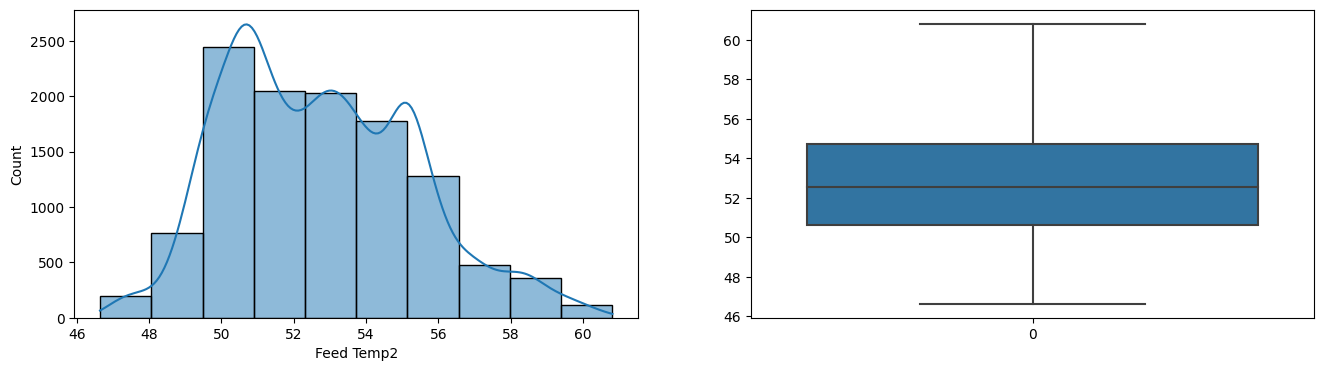

In [176]:
plotvariable(data1, 'Feed Temp2')

bound_info = find_boundaries(data1, 'Feed Temp2')
lbd = bound_info['Feed Temp2_lbd']
ubd = bound_info['Feed Temp2_ubd']

data2 = trim_outliers(data1, 'Feed Temp2', lbd, ubd)

plotvariable(data2, 'Feed Temp2')

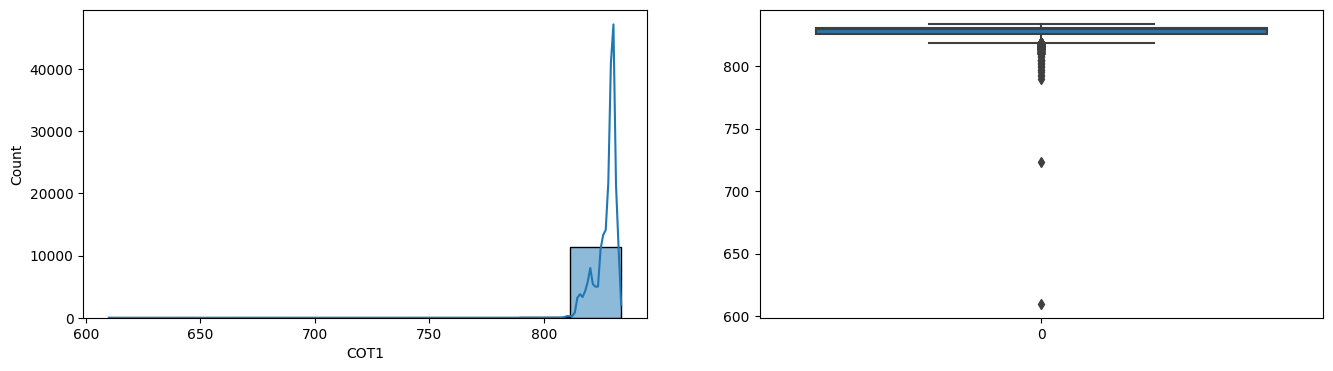

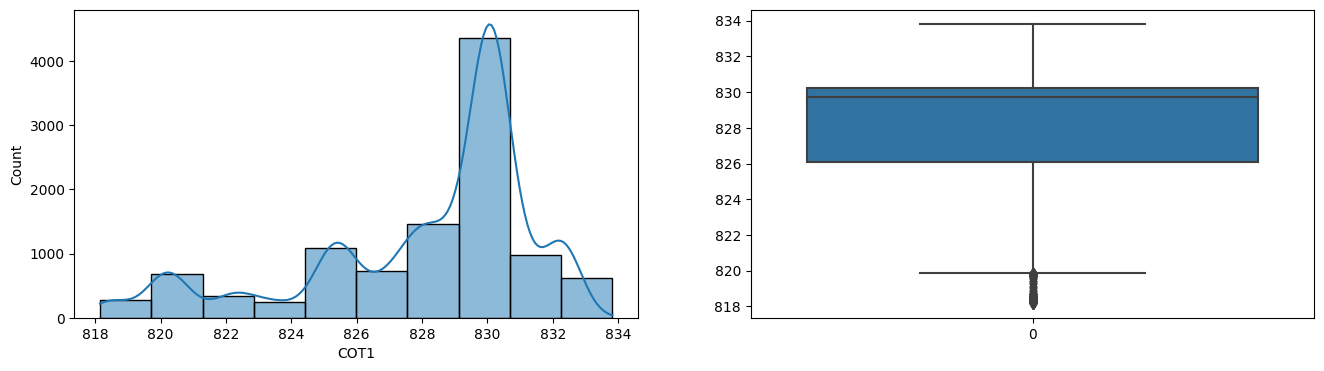

In [177]:
plotvariable(data2, 'COT1')

bound_info = find_boundaries(data2, 'COT1')
lbd = bound_info['COT1_lbd']
ubd = bound_info['COT1_ubd']

data3 = trim_outliers(data2, 'COT1', lbd, ubd)

plotvariable(data3, 'COT1')

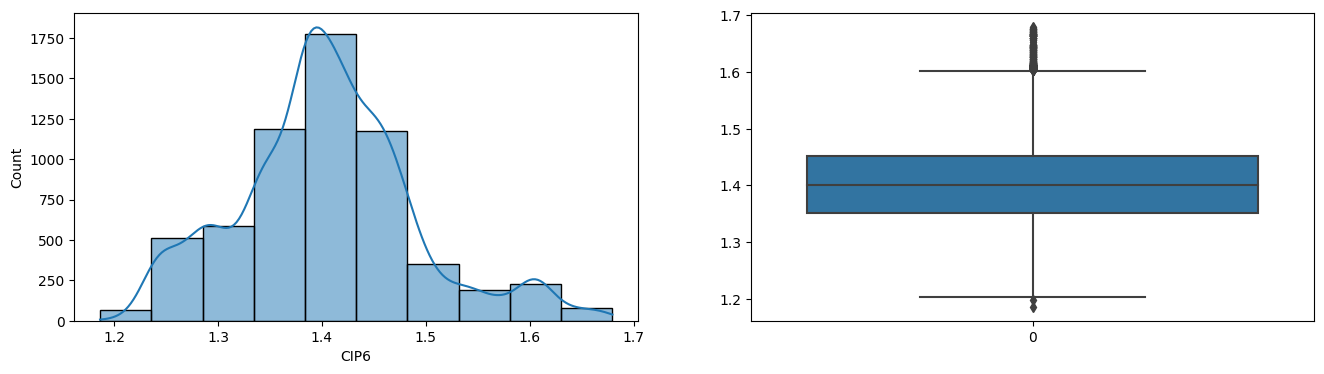

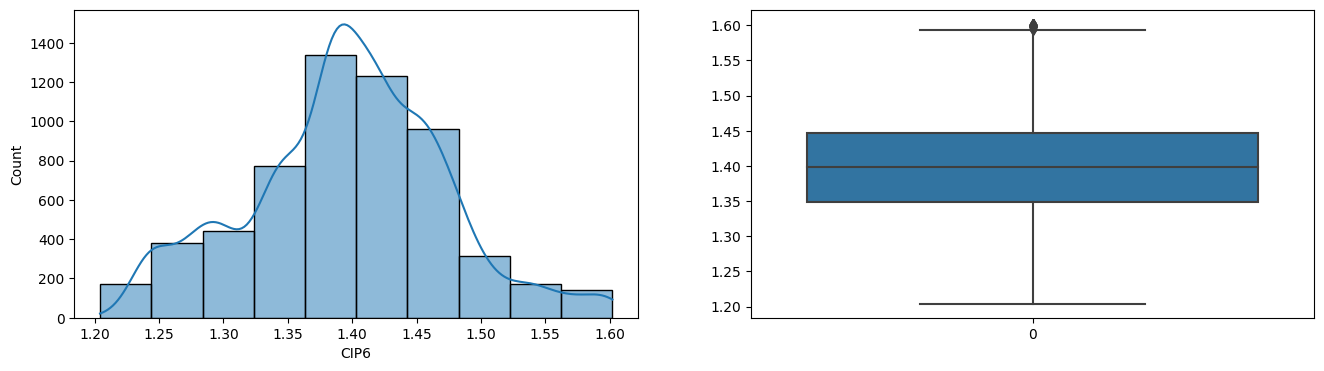

In [202]:
plotvariable(data19, 'CIP6')

bound_info = find_boundaries(data19, 'CIP6')
lbd = bound_info['CIP6_lbd']
ubd = bound_info['CIP6_ubd']

data20 = trim_outliers(data19, 'CIP6', lbd, ubd)

plotvariable(data20, 'CIP6')

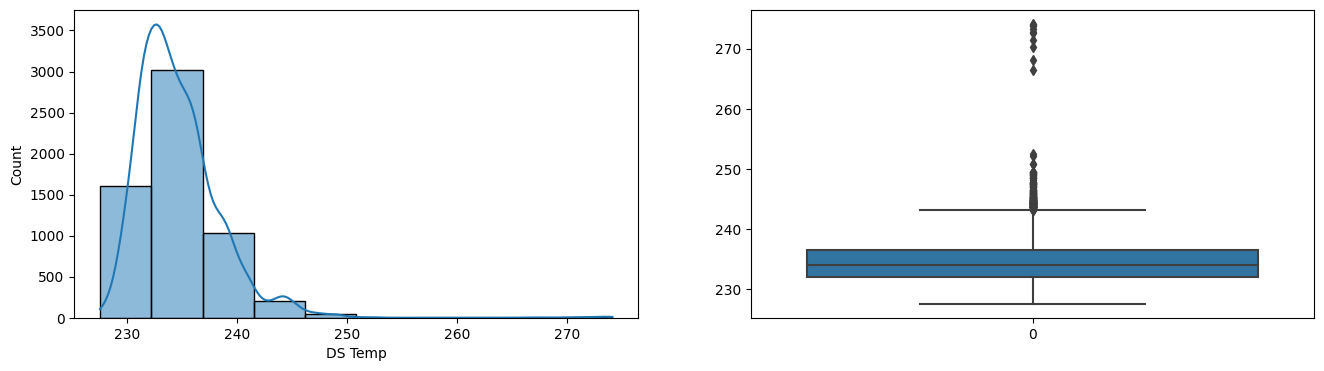

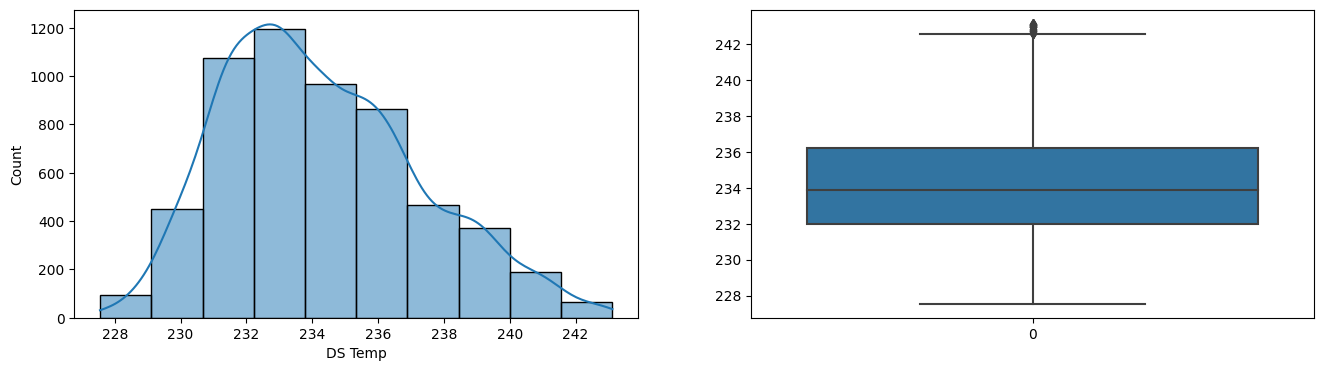

In [206]:
plotvariable(data20, 'DS Temp')

bound_info = find_boundaries(data19, 'DS Temp')
lbd = bound_info['DS Temp_lbd']
ubd = bound_info['DS Temp_ubd']

data21 = trim_outliers(data20, 'DS Temp', lbd, ubd)

plotvariable(data21, 'DS Temp')

In [209]:
data21.shape

(5739, 25)

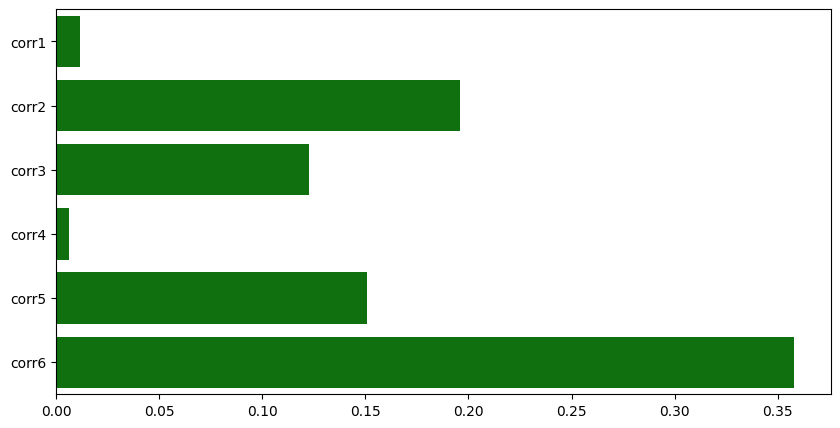

In [210]:
df22 = data21[["COT1", "COT2", "COT3", "COT4", "COT5", "COT6", 
             "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]

corr1 = df22[["COT1", "CIP1"]].corr().reset_index(drop=True)
corr2 = df22[["COT2", "CIP2"]].corr().reset_index(drop=True)
corr3 = df22[["COT3", "CIP3"]].corr().reset_index(drop=True)
corr4 = df22[["COT4", "CIP4"]].corr().reset_index(drop=True)
corr5 = df22[["COT5", "CIP5"]].corr().reset_index(drop=True)
corr6 = df22[["COT6", "CIP6"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1],
    "corr3": corr3[corr3.columns[0]][1],
    "corr4": corr4[corr4.columns[0]][1],
    "corr5": corr5[corr5.columns[0]][1],
    "corr6": corr6[corr6.columns[0]][1]
}

corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='green')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/COTsVSCIPs_new.png")

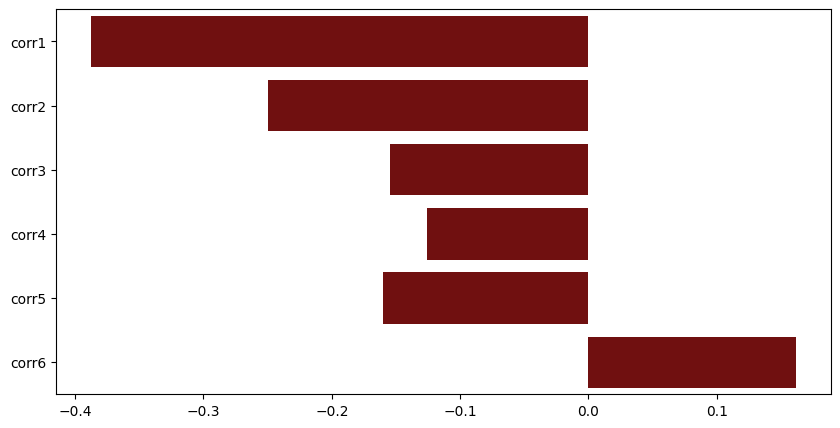

In [211]:
df23 = data21[["DS Ratio1", "DS Ratio2", "DS Ratio3", "DS Ratio4", "DS Ratio5", "DS Ratio6", 
             "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]

corr1 = df23[["DS Ratio1", "CIP1"]].corr().reset_index(drop=True)
corr2 = df23[["DS Ratio2", "CIP2"]].corr().reset_index(drop=True)
corr3 = df23[["DS Ratio3", "CIP3"]].corr().reset_index(drop=True)
corr4 = df23[["DS Ratio4", "CIP4"]].corr().reset_index(drop=True)
corr5 = df23[["DS Ratio5", "CIP5"]].corr().reset_index(drop=True)
corr6 = df23[["DS Ratio6", "CIP6"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1],
    "corr3": corr3[corr3.columns[0]][1],
    "corr4": corr4[corr4.columns[0]][1],
    "corr5": corr5[corr5.columns[0]][1],
    "corr6": corr6[corr6.columns[0]][1]
}


corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='maroon')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/DSRatiosVSCIPs_new.png")

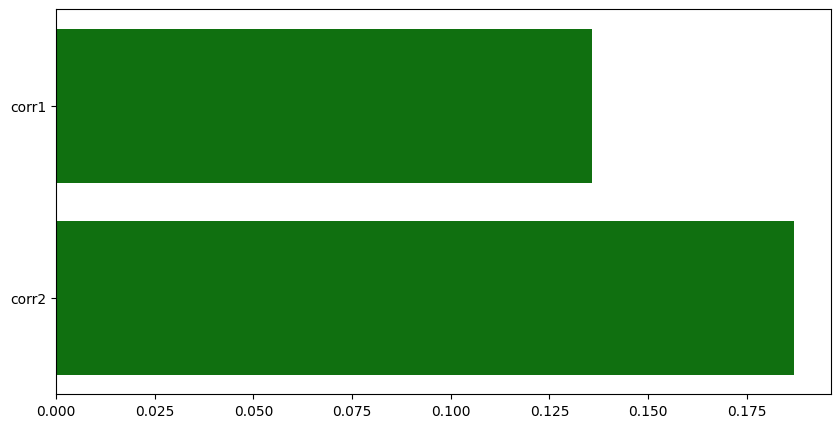

In [212]:
df24 = data21[["Feed Temp1", "Feed Temp2",
            "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]
df24['MAXCIP1'] = df18[["CIP1", "CIP2", "CIP3"]].max(axis=1)
df24['MAXCIP2'] = df18[["CIP4", "CIP5", "CIP6"]].max(axis=1)


corr1 = df24[["Feed Temp1", "MAXCIP1"]].corr().reset_index(drop=True)
corr2 = df24[["Feed Temp2", "MAXCIP2"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1]
}


corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='green')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/FeedTempsVSCIPs_new.png")

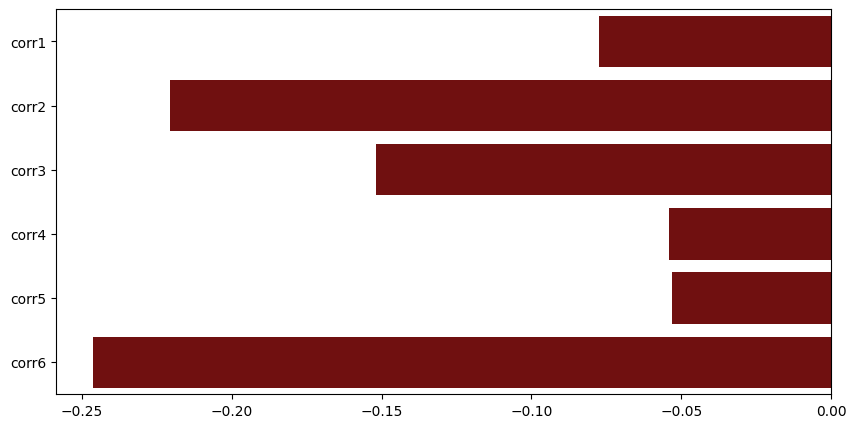

In [213]:
df25 = data21[["DS Temp",
            "CIP1", "CIP2", "CIP3", "CIP4", "CIP5", "CIP6"]]


corr1 = df25[["DS Temp", "CIP1"]].corr().reset_index(drop=True)
corr2 = df25[["DS Temp", "CIP2"]].corr().reset_index(drop=True)
corr3 = df25[["DS Temp", "CIP3"]].corr().reset_index(drop=True)
corr4 = df25[["DS Temp", "CIP4"]].corr().reset_index(drop=True)
corr5 = df25[["DS Temp", "CIP5"]].corr().reset_index(drop=True)
corr6 = df25[["DS Temp", "CIP6"]].corr().reset_index(drop=True)

corr_dic = {
    "corr1": corr1[corr1.columns[0]][1], 
    "corr2": corr2[corr2.columns[0]][1],
    "corr3": corr3[corr3.columns[0]][1],
    "corr4": corr4[corr4.columns[0]][1],
    "corr5": corr5[corr5.columns[0]][1],
    "corr6": corr6[corr6.columns[0]][1]
}


corr_df = pd.DataFrame(corr_dic, index=[0])
plt.figure(figsize=(10,5))
sns.barplot(corr_df, orient="h", color='maroon')
plt.savefig("C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/correlation_plots/DSTempVSCIPs_new.png")

In [13]:
df15.to_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/Merged_BA_106.xlsx", index=False)

In [14]:
df14

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2
0,2021-01-01 00:00:00,17.931329,291.779002,51.315970,51.777013
1,2021-01-01 01:00:00,17.501189,300.087231,51.271270,51.592316
2,2021-01-01 02:00:00,17.774400,310.968798,51.667042,52.060889
3,2021-01-01 03:00:00,16.978837,302.346796,50.711192,51.056434
4,2021-01-01 04:00:00,16.016152,304.273591,51.861070,52.246687
...,...,...,...,...,...
12379,2022-05-31 19:00:00,42.711383,233.667061,50.017260,53.136514
12380,2022-05-31 20:00:00,42.658437,233.670287,49.536603,52.846304
12381,2022-05-31 21:00:00,42.612559,233.371803,49.418948,53.049036
12382,2022-05-31 22:00:00,42.703123,233.243962,50.064544,52.951541


In [15]:
# read the run length data
df_run = pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/RunLength_Data.xlsx") 

In [16]:
df_run

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,AvgCOT,TotalDSRatio,MAXCIP,"RUN Duration, hours",RUN No.
0,2021-01-06 12:00:00,1.178144e-16,272.063493,56.937054,79.477049,799.052065,6.730646,1.032023,0.0,1
1,2021-01-06 13:00:00,1.178144e-16,267.207402,53.334087,82.662585,813.219097,3.517171,1.297556,0.1,1
2,2021-01-06 14:00:00,1.178144e-16,252.592778,52.641992,82.256563,815.159549,3.417967,1.227717,0.2,1
3,2021-01-06 15:00:00,1.178144e-16,253.567194,52.250743,82.205379,814.833182,3.231728,1.293669,0.3,1
4,2021-01-06 16:00:00,1.178144e-16,251.107256,51.066879,82.019186,814.705149,3.116446,1.181593,0.4,1
...,...,...,...,...,...,...,...,...,...,...
11548,2022-05-02 16:00:00,1.057348e+00,232.965838,49.239505,51.584862,817.960936,3.598416,1.469659,59.4,15
11549,2022-05-02 17:00:00,1.378470e+01,232.283094,49.063456,51.495196,818.299786,3.597908,1.472635,59.5,15
11550,2022-05-02 18:00:00,1.380737e+01,231.988511,49.614569,51.453325,817.913417,3.572797,1.469588,59.6,15
11551,2022-05-02 19:00:00,1.384509e+01,232.458175,49.715542,51.378495,818.189503,3.546970,1.472233,59.7,15


In [17]:
run_hours = df_run['RUN Duration, hours']
run_number = df_run['RUN No.']
df_run_1 = df_run.drop(labels=['RUN Duration, hours','RUN No.'], axis=1)
df_run_1['RUN No.'] = run_number
df_run_1['RUN Hours'] = run_hours

In [18]:
# Count the Run Length Hours in each Run
df_run_hours = pd.DataFrame(df_run_1.groupby('RUN No.').count()['RUN Hours'])

In [19]:
df_run_hours["RUN Days"] = round(df_run_hours["RUN Hours"]/24)

In [20]:
df_run_hours

,RUN Hours,RUN Days
RUN No.,,
1,701,29.0
2,894,37.0
3,1007,42.0
4,1000,42.0
5,1017,42.0
6,774,32.0
7,798,33.0
8,494,21.0
9,1008,42.0


In [21]:
ls_run_no = [2,3,4,5,9,10]
ls_run_indices_not_included = []
for idx in range(df_run.shape[0]):
    if df_run['RUN No.'][idx] not in ls_run_no:
        ls_run_indices_not_included.append(idx)        

In [22]:
df_final = df_run.drop(ls_run_indices_not_included).reset_index(drop=True)
df_final

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,AvgCOT,TotalDSRatio,MAXCIP,"RUN Duration, hours",RUN No.
0,2021-02-04 17:00:00,49.401069,236.022106,56.115663,48.984155,808.832747,4.190489,1.155904,0.0,2
1,2021-02-04 18:00:00,49.279729,236.895414,55.916462,48.751670,814.748704,3.196681,1.206476,0.1,2
2,2021-02-04 19:00:00,49.177808,236.125144,55.842318,48.636284,815.069859,3.195885,1.207118,0.2,2
3,2021-02-04 20:00:00,49.295348,236.517173,55.857952,48.732915,815.032673,3.196265,1.219894,0.3,2
4,2021-02-04 21:00:00,49.126847,236.234716,55.921765,48.742308,815.039595,3.195612,1.224086,0.4,2
...,...,...,...,...,...,...,...,...,...,...
5866,2022-01-01 05:00:00,46.091706,233.765960,53.769919,51.528644,828.150162,3.102473,1.628294,94.0,10
5867,2022-01-01 06:00:00,46.086439,233.760613,53.834856,51.527175,828.074746,3.101526,1.635624,94.1,10
5868,2022-01-01 07:00:00,46.170083,234.057052,53.936364,51.709773,828.297426,3.102261,1.646281,94.2,10
5869,2022-01-01 08:00:00,46.238996,233.982195,53.958676,51.755654,827.979357,3.102272,1.649605,94.3,10


In [24]:
# Count the Run Length Hours in each Run
df_run_hours = pd.DataFrame(df_final.groupby('RUN No.').count()['RUN Duration, hours'])
df_run_hours["RUN Days"] = round(df_run_hours["RUN Duration, hours"]/24)
df_run_hours

,"RUN Duration, hours",RUN Days
RUN No.,,
2,894,37.0
3,1007,42.0
4,1000,42.0
5,1017,42.0
9,1008,42.0
10,945,39.0


<AxesSubplot:xlabel='RUN No.', ylabel='RUN Days'>

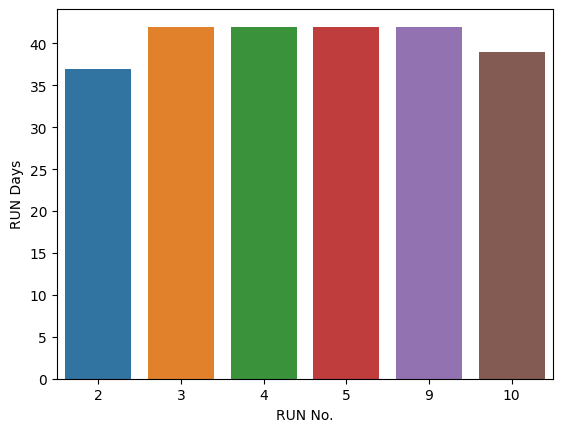

In [26]:
sns.barplot(x=df_run_hours.index, y=df_run_hours['RUN Days'])

In [27]:
df_final

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,AvgCOT,TotalDSRatio,MAXCIP,"RUN Duration, hours",RUN No.
0,2021-02-04 17:00:00,49.401069,236.022106,56.115663,48.984155,808.832747,4.190489,1.155904,0.0,2
1,2021-02-04 18:00:00,49.279729,236.895414,55.916462,48.751670,814.748704,3.196681,1.206476,0.1,2
2,2021-02-04 19:00:00,49.177808,236.125144,55.842318,48.636284,815.069859,3.195885,1.207118,0.2,2
3,2021-02-04 20:00:00,49.295348,236.517173,55.857952,48.732915,815.032673,3.196265,1.219894,0.3,2
4,2021-02-04 21:00:00,49.126847,236.234716,55.921765,48.742308,815.039595,3.195612,1.224086,0.4,2
...,...,...,...,...,...,...,...,...,...,...
5866,2022-01-01 05:00:00,46.091706,233.765960,53.769919,51.528644,828.150162,3.102473,1.628294,94.0,10
5867,2022-01-01 06:00:00,46.086439,233.760613,53.834856,51.527175,828.074746,3.101526,1.635624,94.1,10
5868,2022-01-01 07:00:00,46.170083,234.057052,53.936364,51.709773,828.297426,3.102261,1.646281,94.2,10
5869,2022-01-01 08:00:00,46.238996,233.982195,53.958676,51.755654,827.979357,3.102272,1.649605,94.3,10


In [32]:
df_final_01 = pd.DataFrame(df_final.groupby("RUN No.").last()["RUN Duration, hours"])
df_final_01

,"RUN Duration, hours"
RUN No.,
2,89.3
3,100.6
4,99.9
5,101.6
9,100.7
10,94.4


In [33]:
last_val_from_each_run_dic = dict()
for hrs in df_final_01["RUN Duration, hours"]:
    last_val_from_each_run_dic[df_final_01[df_final_01['RUN Duration, hours']==hrs].index.values[0]] = hrs

In [34]:
last_val_from_each_run_dic

{2: 89.30000000000001, 3: 100.6, 4: 99.9, 5: 101.6, 9: 100.7, 10: 94.4}

In [37]:
# store the remainng hrs in a list
reverse_list_run_duration = []
for run, hrs in zip(df_final["RUN No."], df_final["RUN Duration, hours"]):
    if run in df_final["RUN No."].unique().tolist():
        reverse_list_run_duration.append(last_val_from_each_run_dic[run]-hrs)
        
# make a final data frame
df_final["RUN Duration, Hours Remained"] = reverse_list_run_duration

In [38]:
df_final

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,AvgCOT,TotalDSRatio,MAXCIP,"RUN Duration, hours",RUN No.,"RUN Duration, Hours Remained"
0,2021-02-04 17:00:00,49.401069,236.022106,56.115663,48.984155,808.832747,4.190489,1.155904,0.0,2,89.3
1,2021-02-04 18:00:00,49.279729,236.895414,55.916462,48.751670,814.748704,3.196681,1.206476,0.1,2,89.2
2,2021-02-04 19:00:00,49.177808,236.125144,55.842318,48.636284,815.069859,3.195885,1.207118,0.2,2,89.1
3,2021-02-04 20:00:00,49.295348,236.517173,55.857952,48.732915,815.032673,3.196265,1.219894,0.3,2,89.0
4,2021-02-04 21:00:00,49.126847,236.234716,55.921765,48.742308,815.039595,3.195612,1.224086,0.4,2,88.9
...,...,...,...,...,...,...,...,...,...,...,...
5866,2022-01-01 05:00:00,46.091706,233.765960,53.769919,51.528644,828.150162,3.102473,1.628294,94.0,10,0.4
5867,2022-01-01 06:00:00,46.086439,233.760613,53.834856,51.527175,828.074746,3.101526,1.635624,94.1,10,0.3
5868,2022-01-01 07:00:00,46.170083,234.057052,53.936364,51.709773,828.297426,3.102261,1.646281,94.2,10,0.2
5869,2022-01-01 08:00:00,46.238996,233.982195,53.958676,51.755654,827.979357,3.102272,1.649605,94.3,10,0.1


In [41]:
df_final_02 = df_final.drop(labels=['Date', 'RUN Duration, hours', 'RUN No.'], axis = 1)

In [42]:
df_final_02

,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,AvgCOT,TotalDSRatio,MAXCIP,"RUN Duration, Hours Remained"
0,49.401069,236.022106,56.115663,48.984155,808.832747,4.190489,1.155904,89.3
1,49.279729,236.895414,55.916462,48.751670,814.748704,3.196681,1.206476,89.2
2,49.177808,236.125144,55.842318,48.636284,815.069859,3.195885,1.207118,89.1
3,49.295348,236.517173,55.857952,48.732915,815.032673,3.196265,1.219894,89.0
4,49.126847,236.234716,55.921765,48.742308,815.039595,3.195612,1.224086,88.9
...,...,...,...,...,...,...,...,...
5866,46.091706,233.765960,53.769919,51.528644,828.150162,3.102473,1.628294,0.4
5867,46.086439,233.760613,53.834856,51.527175,828.074746,3.101526,1.635624,0.3
5868,46.170083,234.057052,53.936364,51.709773,828.297426,3.102261,1.646281,0.2
5869,46.238996,233.982195,53.958676,51.755654,827.979357,3.102272,1.649605,0.1


# EDA

In [43]:
df_max_cip = df_final_02.drop(labels=['RUN Duration, Hours Remained'], axis=1)
df_max_cip

,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,AvgCOT,TotalDSRatio,MAXCIP
0,49.401069,236.022106,56.115663,48.984155,808.832747,4.190489,1.155904
1,49.279729,236.895414,55.916462,48.751670,814.748704,3.196681,1.206476
2,49.177808,236.125144,55.842318,48.636284,815.069859,3.195885,1.207118
3,49.295348,236.517173,55.857952,48.732915,815.032673,3.196265,1.219894
4,49.126847,236.234716,55.921765,48.742308,815.039595,3.195612,1.224086
...,...,...,...,...,...,...,...
5866,46.091706,233.765960,53.769919,51.528644,828.150162,3.102473,1.628294
5867,46.086439,233.760613,53.834856,51.527175,828.074746,3.101526,1.635624
5868,46.170083,234.057052,53.936364,51.709773,828.297426,3.102261,1.646281
5869,46.238996,233.982195,53.958676,51.755654,827.979357,3.102272,1.649605


In [46]:
# initial correlation
corr_matrix = df_final_02.corr()
corr_matrix['RUN Duration, Hours Remained'].sort_values(ascending=True)

MAXCIP                         -0.843110
Feed Temp2                     -0.169814
AvgCOT                         -0.131909
Feed Temp1                     -0.060622
BFW Rate                        0.015424
DS Temp                         0.075666
TotalDSRatio                    0.081903
RUN Duration, Hours Remained    1.000000
Name: RUN Duration, Hours Remained, dtype: float64

In [47]:
def plotvariable(dataframe, variable):
  
    plt.figure(figsize=(16,4))
    # histogram
    plt.subplot(1,2,1)
    # plt.hist(dataframe[variable], alpha=0.5)
    sns.histplot(dataframe[variable], bins=10, kde=True)

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(dataframe[variable])
    plt.show()

def find_boundaries(dataframe, variable):

    # create an empty dic
    bound_dict = {} 

    # find the IOR 
    Q1 = dataframe[variable].quantile(.25)
    Q3 = dataframe[variable].quantile(.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    bound_dict[f'{variable}_Q1'] = Q1
    bound_dict[f'{variable}_Q3'] = Q3
    bound_dict[f'{variable}_IQR'] = IQR
    bound_dict[f'{variable}_lbd'] = lower_bound
    bound_dict[f'{variable}_ubd'] = upper_bound

    return bound_dict


def trim_outliers(dataframe, variable, lbd, ubd):

    # replace the outliers with True
    outliers = np.where(dataframe[variable] > ubd, True, 
    np.where(dataframe[variable] < lbd, True, False))

    # trimmed data
    trimmed_data = dataframe.loc[~(outliers)].reset_index(drop=True)

    return trimmed_data

In [48]:
df_final_02.columns

Index(['BFW Rate', 'DS Temp', 'Feed Temp1', 'Feed Temp2', 'AvgCOT',
       'TotalDSRatio', 'MAXCIP', 'RUN Duration, Hours Remained'],
      dtype='object')

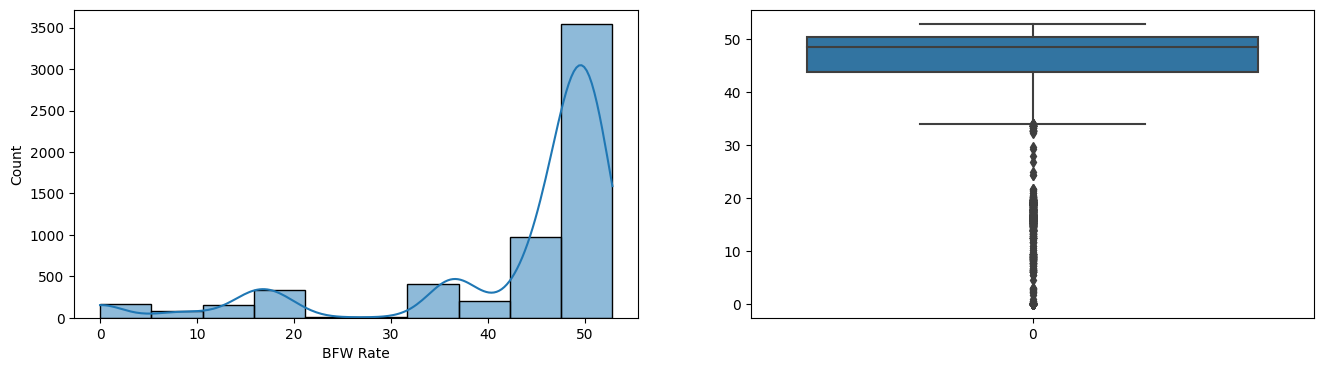

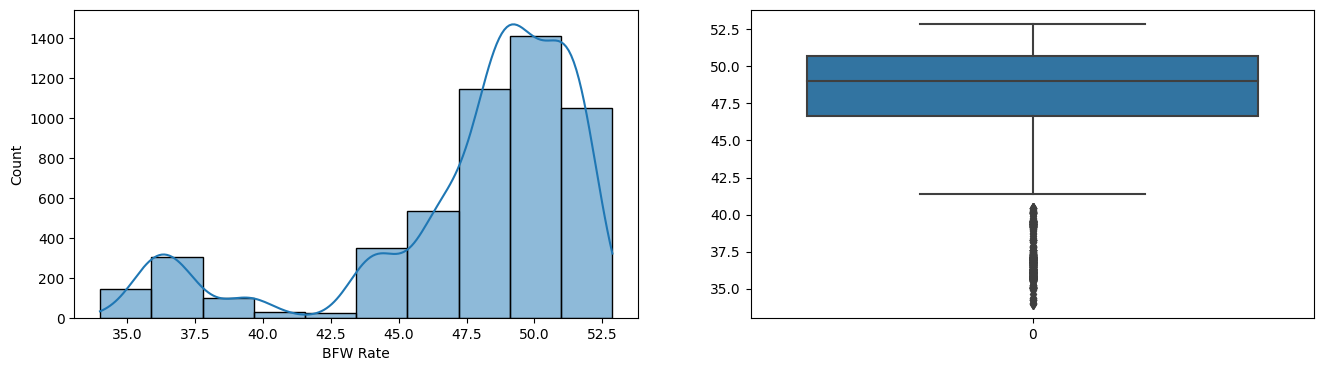

In [50]:
plotvariable(df_final_02, 'BFW Rate')


bound_info = find_boundaries(df_final_02, 'BFW Rate')
bound_info

lbd = bound_info['BFW Rate_lbd']
ubd = bound_info['BFW Rate_ubd']

df_final_03 = trim_outliers(df_final_02, 'BFW Rate', lbd, ubd)


plotvariable(df_final_03, 'BFW Rate')

In [51]:
corr_matrix_1 = df_final_03.corr()
corr_matrix_1['RUN Duration, Hours Remained'].sort_values(ascending=True)

MAXCIP                         -0.841984
Feed Temp2                     -0.176915
AvgCOT                         -0.126932
Feed Temp1                     -0.044672
BFW Rate                       -0.024895
DS Temp                         0.104219
TotalDSRatio                    0.145531
RUN Duration, Hours Remained    1.000000
Name: RUN Duration, Hours Remained, dtype: float64

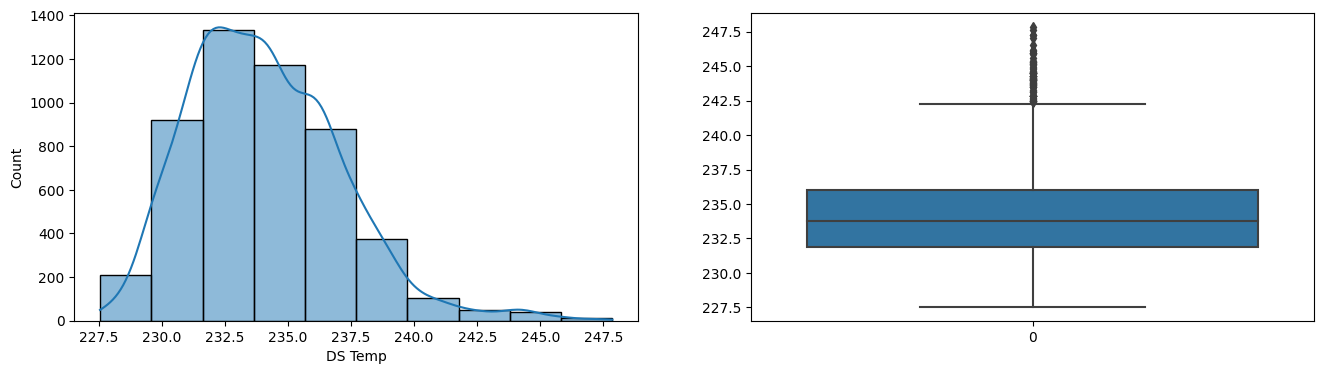

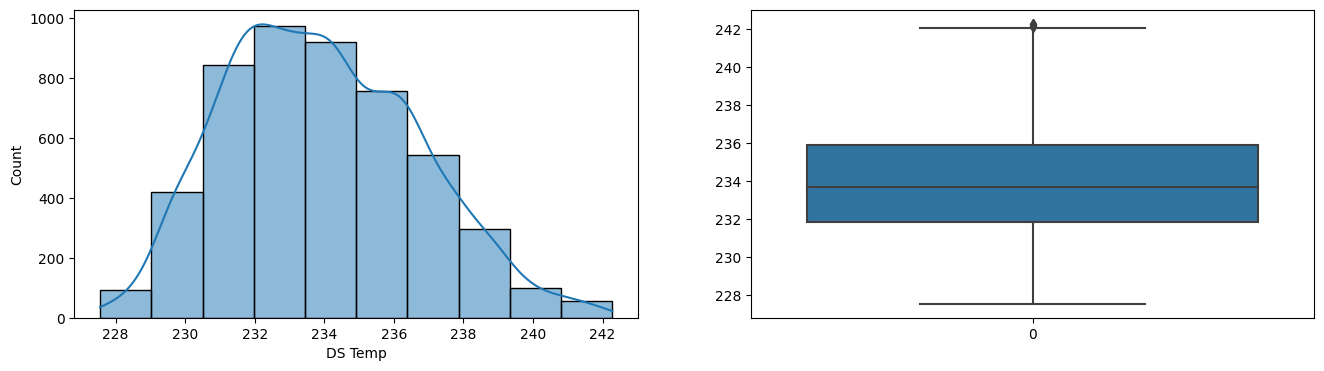

In [53]:
plotvariable(df_final_03, 'DS Temp')


bound_info = find_boundaries(df_final_03, 'DS Temp')
bound_info

lbd = bound_info['DS Temp_lbd']
ubd = bound_info['DS Temp_ubd']

df_final_04 = trim_outliers(df_final_03, 'DS Temp', lbd, ubd)


plotvariable(df_final_04, 'DS Temp')

In [54]:
corr_matrix_2 = df_final_04.corr()
corr_matrix_2['RUN Duration, Hours Remained'].sort_values(ascending=True)

MAXCIP                         -0.841742
Feed Temp2                     -0.221807
AvgCOT                         -0.140488
Feed Temp1                     -0.049469
BFW Rate                       -0.027636
DS Temp                         0.088220
TotalDSRatio                    0.151319
RUN Duration, Hours Remained    1.000000
Name: RUN Duration, Hours Remained, dtype: float64

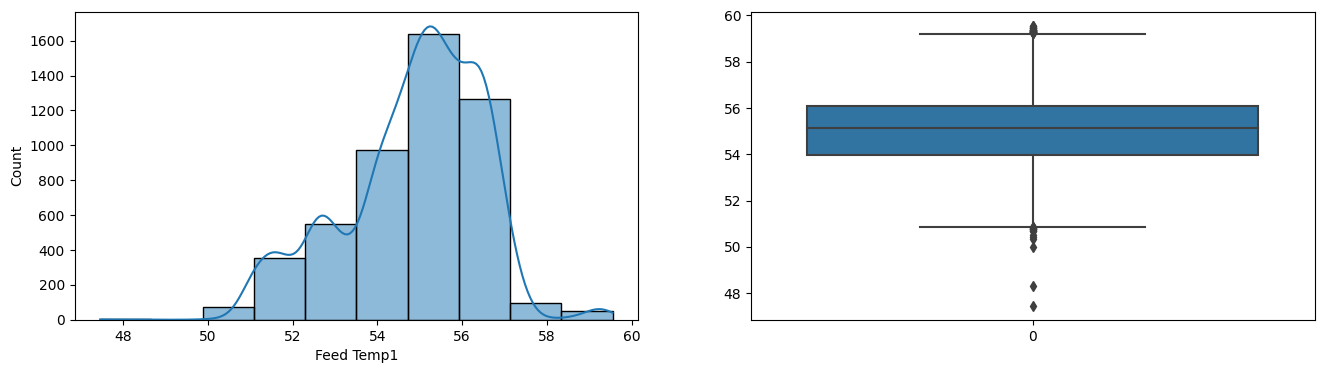

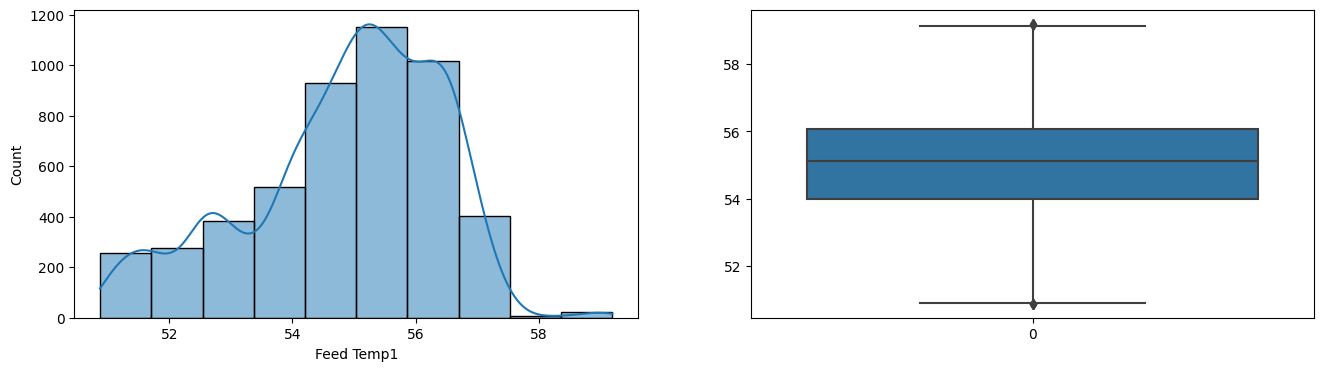

In [58]:
plotvariable(df_final_04, 'Feed Temp1')


bound_info = find_boundaries(df_final_04, 'Feed Temp1')
bound_info

lbd = bound_info['Feed Temp1_lbd']
ubd = bound_info['Feed Temp1_ubd']

df_final_05 = trim_outliers(df_final_04, 'Feed Temp1', lbd, ubd)


plotvariable(df_final_05, 'Feed Temp1')

In [56]:
corr_matrix_3 = df_final_05.corr()
corr_matrix_3['RUN Duration, Hours Remained'].sort_values(ascending=True)

MAXCIP                         -0.844780
Feed Temp2                     -0.221040
AvgCOT                         -0.140432
Feed Temp1                     -0.044664
BFW Rate                       -0.026795
DS Temp                         0.089393
TotalDSRatio                    0.151531
RUN Duration, Hours Remained    1.000000
Name: RUN Duration, Hours Remained, dtype: float64

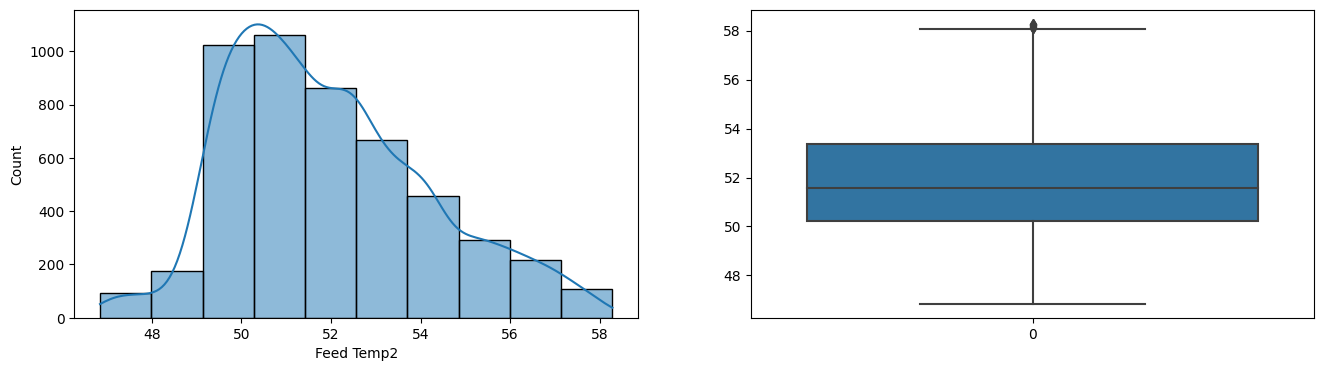

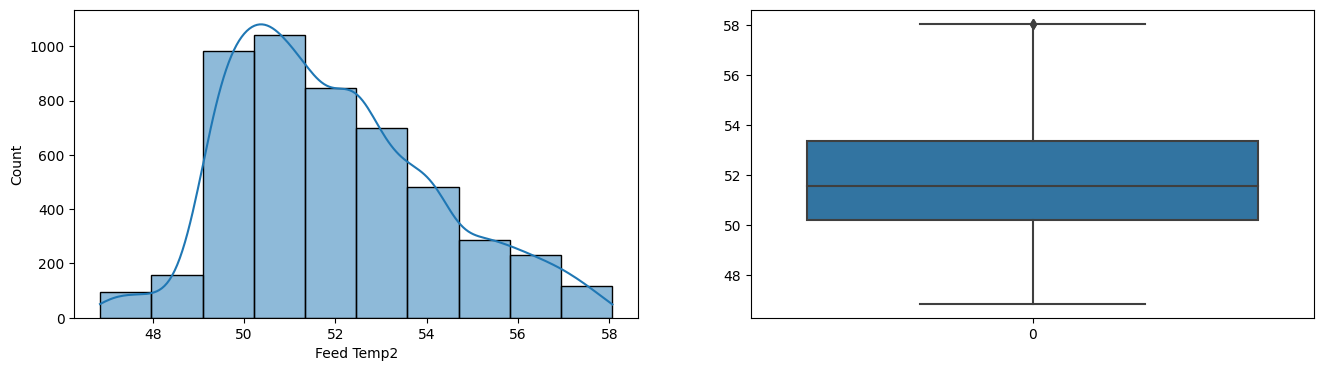

In [60]:
plotvariable(df_final_05, 'Feed Temp2')


bound_info = find_boundaries(df_final_05, 'Feed Temp2')
bound_info

lbd = bound_info['Feed Temp2_lbd']
ubd = bound_info['Feed Temp2_ubd']

df_final_06 = trim_outliers(df_final_05, 'Feed Temp2', lbd, ubd)


plotvariable(df_final_06, 'Feed Temp2')

In [61]:
corr_matrix_4 = df_final_05.corr()
corr_matrix_4['RUN Duration, Hours Remained'].sort_values(ascending=True)

MAXCIP                         -0.842157
Feed Temp2                     -0.259077
AvgCOT                         -0.159082
Feed Temp1                     -0.056561
BFW Rate                       -0.033099
DS Temp                         0.071525
TotalDSRatio                    0.156136
RUN Duration, Hours Remained    1.000000
Name: RUN Duration, Hours Remained, dtype: float64

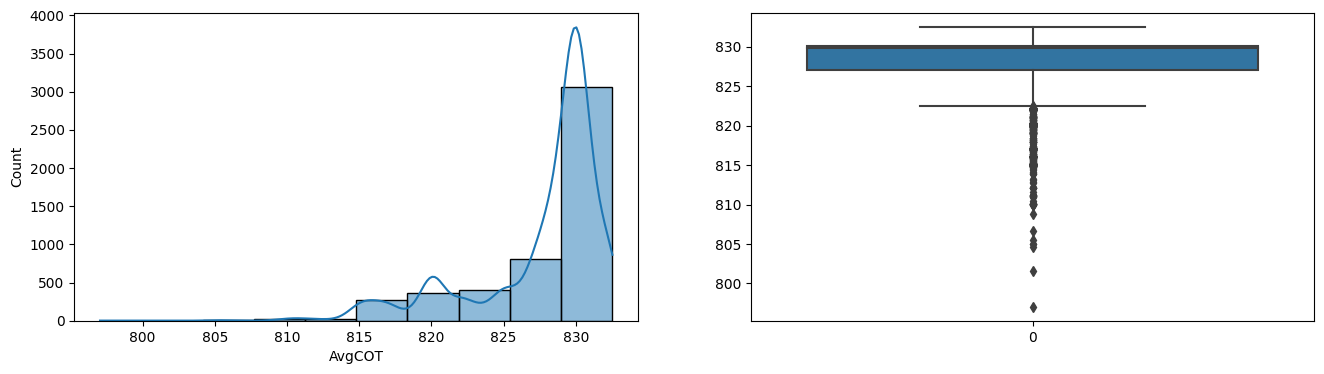

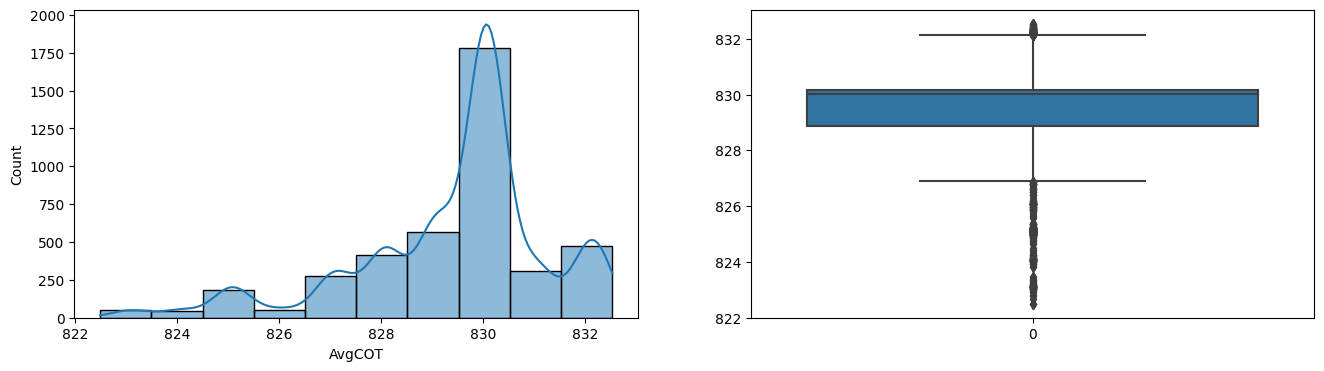

In [63]:
plotvariable(df_final_06, 'AvgCOT')


bound_info = find_boundaries(df_final_06, 'AvgCOT')
bound_info

lbd = bound_info['AvgCOT_lbd']
ubd = bound_info['AvgCOT_ubd']

df_final_07 = trim_outliers(df_final_06, 'AvgCOT', lbd, ubd)


plotvariable(df_final_07, 'AvgCOT')

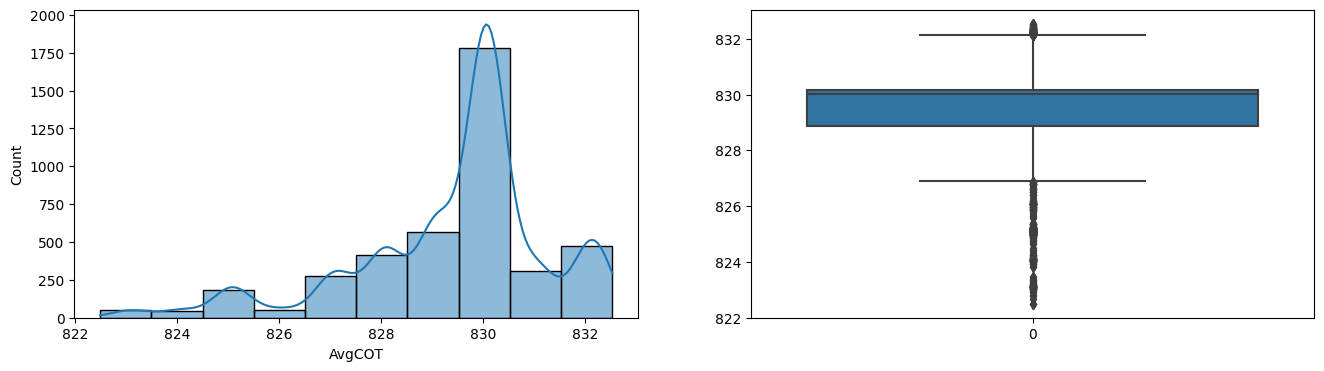

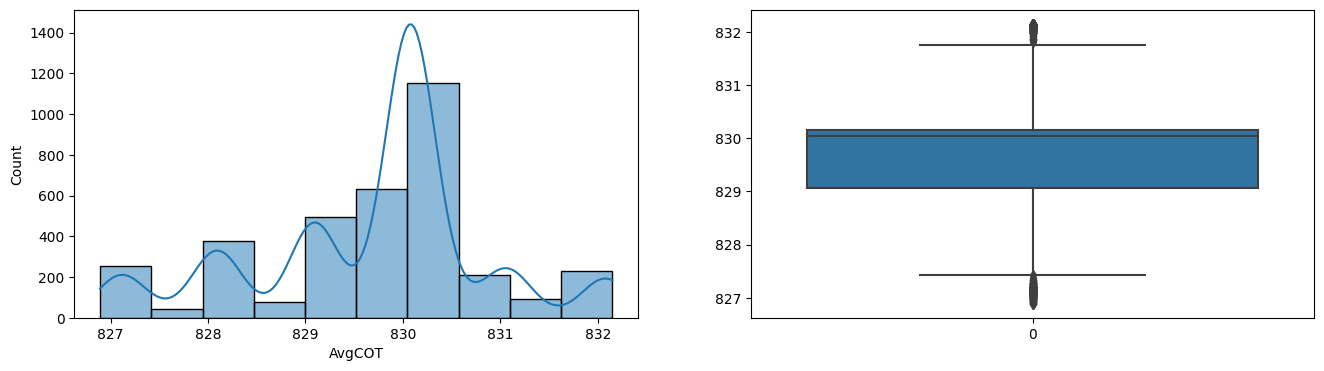

In [64]:
plotvariable(df_final_07, 'AvgCOT')


bound_info = find_boundaries(df_final_07, 'AvgCOT')
bound_info

lbd = bound_info['AvgCOT_lbd']
ubd = bound_info['AvgCOT_ubd']

df_final_08 = trim_outliers(df_final_07, 'AvgCOT', lbd, ubd)


plotvariable(df_final_08, 'AvgCOT')

In [62]:
df_final_06.columns

Index(['BFW Rate', 'DS Temp', 'Feed Temp1', 'Feed Temp2', 'AvgCOT',
       'TotalDSRatio', 'MAXCIP', 'RUN Duration, Hours Remained'],
      dtype='object')

In [65]:
df_final_08

,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,AvgCOT,TotalDSRatio,MAXCIP,"RUN Duration, Hours Remained"
0,43.309436,237.645804,56.881312,49.733124,827.012753,3.052584,1.392756,78.2
1,44.790282,237.822941,57.143936,50.099935,826.906040,3.064328,1.396692,78.1
2,46.244382,237.484849,56.988171,49.954728,827.288397,3.070618,1.393070,78.0
3,46.273110,238.968515,56.663093,49.909987,827.120768,3.068950,1.389620,77.9
4,46.391788,238.711735,56.682008,49.955668,827.102319,3.059655,1.330180,77.8
...,...,...,...,...,...,...,...,...
3548,45.876210,233.864395,53.761770,51.559736,828.180644,3.102292,1.622924,0.5
3549,46.091706,233.765960,53.769919,51.528644,828.150162,3.102473,1.628294,0.4
3550,46.086439,233.760613,53.834856,51.527175,828.074746,3.101526,1.635624,0.3
3551,46.170083,234.057052,53.936364,51.709773,828.297426,3.102261,1.646281,0.2


In [66]:
df_final_08['RUN Duration, Hours Remained'].describe()

count    3553.000000
mean       46.663749
std        27.378549
min         0.100000
25%        22.500000
50%        47.400000
75%        68.800000
max        97.600000
Name: RUN Duration, Hours Remained, dtype: float64

In [68]:
df_final_02['RUN Duration, Hours Remained'].describe()

count    5871.000000
mean       48.976256
std        28.418681
min         0.000000
25%        24.400000
50%        48.900000
75%        73.300000
max       101.600000
Name: RUN Duration, Hours Remained, dtype: float64

In [70]:
1016/24

42.333333333333336

In [72]:
df_new = df_final_02[['MAXCIP','RUN Duration, Hours Remained']]

In [81]:
df_new.to_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/final_run_data.xlsx", index=False)

<Figure size 2000x1000 with 0 Axes>

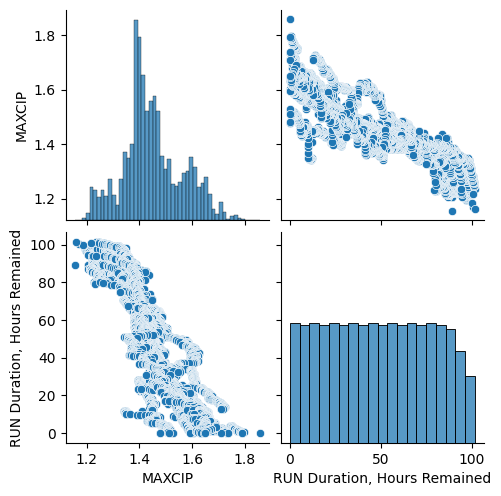

In [78]:
plt.figure(figsize=(20,10))
sns.pairplot(df_new)

In [80]:
df_final[['MAXCIP', 'RUN Duration, hours']].corr()

,MAXCIP,"RUN Duration, hours"
MAXCIP,1.000000,0.864565
"RUN Duration, hours",0.864565,1.000000
